## a)  
Here we only have 8 cups to test and we let the lady test all of them (Fisher sharp null), rather than we offer 8 cups but only let the lady test part of them, in which case randomization consideration (Neyman's approach) is more appropriate.

*Self-reading: Fisher alsp later discussed the benefits of more trials and repeated tests.*

## b)  
We will calculate Fisher's exact p value.  
Fisherian sharp null ($H_0$): The lady has no faculty of discrimination. Under $H_0$, the distribution of $\tau$ is calculated as below using permutation test.

values of $\tau$

In [1]:
import numpy as np
tau=[0]*5
# getting 0,1,2,3,4 of the cus right

for i in range(0,5):
    y_1=[1]*i +[0]*(4-i)
    y_0=[1]*(4-i) +[0]*i
    tau[4-i]=(np.mean(y_1)-np.mean(y_0))
tau

[1.0, 0.5, 0.0, -0.5, -1.0]

value of probability regarding each $\tau$

In [3]:
# The total number of combination (A,B): choosing B cups from A being 1, the rest being 0.

def numCombination(A,B):
    A=int(A)
    B=int(B)
    
    if B==0:
        return int(1)
    
    nominator=1
    for i in range(A,(A-B),-1):
        nominator=nominator*i

    denominator=1
    for i in range(B,0,-1):
        denominator=denominator*i
        
    return int(nominator/denominator)

#     getting n cups right

def prob(n):
    result=numCombination(4,n)*numCombination(4,(4-n))/numCombination(8,4)
    return result

problist=[0]*5
for i in range(0,5):
    problist[4-i]=prob(i)
problist

[0.014285714285714285,
 0.22857142857142856,
 0.5142857142857142,
 0.22857142857142856,
 0.014285714285714285]

\begin{cases}
  \tau=1 & with prob\  {0.014}
  \\
  \tau=0.5 &with prob\  {0.229}
    \\
  \tau=0 &with prob\ {0.514}
      \\
  \tau=-0.5 &with prob\ {0.229}
          \\
  \tau=-1 &with prob\  {0.014}
\end{cases}

Fisher's exact P value regarding different $\hat{\tau}$


<mark>Notice that we should not use absolute value as -1 means totally wrong. We use right side here. </mark> 

\begin{cases}
  \hat{\tau}\geq1 & p=\  {0.014}
  \\
\hat{\tau}\geq0.5 & p=\  {0.243}
    \\
\hat{\tau}\geq0 &p=\ {0.757}
      \\
\hat{\tau}\geq-0.5 &p=\ {0.986}
          \\
\hat{\tau}\geq-1 &p=\  {1}
\end{cases}

 As $0.0014<0.05$, if and only if the lady properly categorized all 8 cups, will Fisher's algorithm be willing to reject the null hypothesis – effectively acknowledging the lady's ability at a 1.4% significance level.
  
<mark> I am not sure how is significance of the test defined and why we have a smallest</mark>

## c)   
If lady has perfect discriminatory powers ($ Yi(z) = z$), then $\hat{\tau} = 1$.
Whether to reject and Probability of rejecting the null <mark> depend on the p-value we set, so how can we come up with a probability without mentioning the threshold set</mark>. If the threshold is wet to be 0.01, then we will never reject null hypothesis.

## d)  
If lady gives each cup a score $Si$ and declares the top four scored cups to have milk first, where $Si ∼ unif[\min \{Zi, 1 − γ \} , \max \{Zi, γ\}]$ for some $γ ∈ (0, 1)$), the p value will be changed.

If $Zi=0$, $Si ∼ unif[0, γ]$,  
If $Zi=1$, $Si ∼ unif[1-γ,1]$.

Under null hypothesis (the lady has no sense), the distribution of $\tau$ is still the same, but we notice that in this case, the lady has some sense of discrimination as the $\gamma$ indicates.

We notice that 
- if $\gamma <= 0.5$, the lady will rank all "milk first" over "tea first", thus we will have $\tau=1$ (we ignore the ppint where $\gamma = 0.5$ as the prob is too small to be considered;
- if $\gamma > 0.5$, there is some probability that some $Si ∼ unif[0, γ]$ might be bigger than $Si ∼ unif[1-γ,1]$. There should be methods to calculate this analytically. Here we use <mark>simulation </mark> to reduce theoretical difficulty.

In [4]:
def simuTau(gamma,num_iter):
    
    iter_sum=0
    
    for iter in range(num_iter):
        s_y0=np.random.uniform(0,gamma,4)
        s_y1=np.random.uniform(1-gamma,1,4)

        si=[]
        for item in s_y0:
            si.append(item)
        for item in s_y1:
            si.append(item)

        # we ignore the very small-likely-to happen situation where the median is the same one or more item in the list

        yi_1=[]

        median_=np.median(si)

        for item in s_y1:
            yi_1.append( item>median_)

        tao_hat=sum(yi_1)/4-(4-sum(yi_1))/4

        iter_sum+=tao_hat
    
    return iter_sum/num_iter


Since there is randomness in the lady's judgement process. The $\hat{\tau}$ will differ from trial to trial (each 8-cup test is a trial). For example if we set $\gamma$ to be 0.7, then the $\hat{\tau}$ we see in 5 different trials could be:

In [79]:
for i in range(0,5):
    print(simuTau(0.7,1))

0.0
0.5
1.0
0.5
0.0


Here we calculate the expectation of $\hat{\tau}$ regarding to $\gamma=0.7$ as an example.

In [84]:
print(simuTau(0.7,10000))

0.484


We use the expected $\hat{\tau}$ to calculate the p-values for each $\gamma$. Here we use $\gamma=0.7$ as an example.

In [5]:
def simuP(gamma,num_iter,tau_permutate,problist_permutate):
#     print(simuTau(gamma,num_iter))
    for i in range(0,5):
#         print(i)
        if simuTau(gamma,num_iter) >= tau_permutate[i]:
#             print(problist_permutate[:i+1])
            return sum(problist_permutate[:i+1])

simuP(0.7,10000,tau,problist)

0.7571428571428571

We can now draw the p-value for different $\gamma$ 

In [14]:
def simuPArray(gamma_array,num_iter,tau_permutate,problist_permutate):
    result=[]
    for item in gamma_array:
        result.append(simuP(item,num_iter,tau_permutate,problist_permutate))
    return result

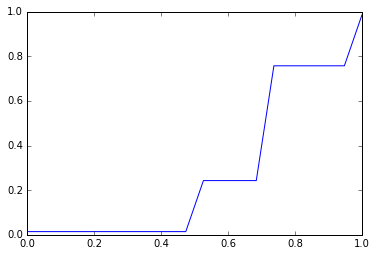

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  

x_ = np.linspace(0, 1, 20)
y_=simuPArray(x_,50000,tau,problist)

plt.plot(x_,y_)
# plt.title('A simple chirp')
# plt.plot(timeArray, data, color='k')
# plt.ylabel('Amplitude')
# plt.xlabel('Time (ms)')
plt.show()